# CMSE Homework 04


### Assignment instructions

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

There are 25 points possible on this assignment. Point values for each part are included in the section headers.

This assignment is due roughly two weeks from now at 11:59 pm on **Friday March 13**. It should be uploaded into the "Homework Assignments" submission folder for Homework #4 in your D2L webpage. Submission instructions can be found at the end of the notebook.

**Hint**: It is possible you are asked to do something you are not familiar with. That's why you have internet access. Do some smart searches and see what you can find! 

---
## Part 1: Setting up a repository for tracking changes (3 points)

For this assignment, you're going to add it to the cmse202-s20-turnin repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to:

* Navigate to your `cmse202-s20-turnin` repository and create a new directory called `hw-04`.
* Move this notebook into that new directory in your repository, then add it and commit it to your repository.
 * Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

Important: Make sure you've added your PTA as a collaborators\ to your "turnin" respository with "Read" access so that we can see your assignment.

* Section 001: nchamusah14
* Section 002: nchamusah14
* Section 003: genster6

Also important: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, none of your changes will be tracked.

If everything went as intended, the file should now show up on your GitHub account in the `cmse202-s20-turnin` repository under the `hw-04` directory that you just created. Periodically, you'll be asked to commit your changes to the repository and push them to the remote GitHub location. Of course, you can always commit your changes more often than that, if you wish. It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

## Part 2: Loading and Sorting the Data (5 points)

For this homework we will work with the data of Olymptic medals won by Team USA. You will learn sorting data in a data frame, building and evaluating a logistic regression model, and writing python classes.

**Important Note** It is possible that you could modify the spreadsheet to make it easier to work with. **Don't** We will test your code on the original spreadsheet provided. Any changes should be made programmatically.

**Question 2.1 (1 points)** Take a look at the spreadsheet "Olympic.csv" file and read it into a dataframe. The data is in chronological order by default. Here are some features you should deal with when you load it.

* Remove the column that records the number of athletes.
* Remove the row that contains "Did not participate".
* Remove the last row that counts the all-time totals.

You will end up with a data frame of 27 rows.

In [40]:
### Put your code here ###
import pandas as pd
data = pd.read_csv("Olympic.csv", skiprows = (19,29))
data = data.drop("Athletes", axis = 1)

Games     object
Gold       int64
Silver     int64
Bronze     int64
Total      int64
dtype: object

**Question 2.2 (1 point):** The last column in the data frame shows the total number of gold, silver and bronze medals in each game. Sort the data frame so that the column "Total" is *ascending*.

In [24]:
### Put your code here ###
data = data.sort_values(by = "Total", ascending = True)
data

,Games,Gold,Silver,Bronze,Total
0,1896 Athens,11,7,2,20
1,1900 Paris,19,14,14,47
3,1908 London,23,12,12,47
9,1936 Berlin,24,20,12,56
7,1928 Amsterdam,22,18,16,56
4,1912 Stockholm,25,19,19,63
13,1960 Rome,34,21,16,71
12,1956 Melbourne,32,25,17,74
11,1952 Helsinki,40,19,17,76
10,1948 London,38,27,19,84


**Question 2.3 (1 point):** Draw the histogram of total medals using a method from *pandas*.

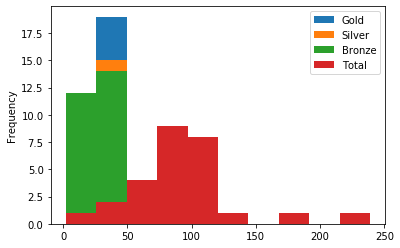

In [25]:
### Put your code here ###
data.plot.hist()

**Question 2.4 (1 point):** The column "Gold" in the data frame shows the number of gold medals in each game. Re-sort the data frame so that the "Gold" column is *descending*. In the case of equal gold medals, the number of silver medals should be *descending*. In the case of equal gold and silver medals, the number of bronze medals should be *descending*.

In [35]:
### Put your code here ###
data = data.sort_values(by = ["Gold","Silver","Bronze"], ascending = False)
data

,Games,Gold,Silver,Bronze,Total
18,1984 Los Angeles,83,61,30,174
2,1904 St. Louis,78,82,79,239
26,2016 Rio de Janeiro,46,37,38,121
25,2012 London,46,28,30,104
15,1968 Mexico City,45,28,34,107
6,1924 Paris,45,27,27,99
21,1996 Atlanta,44,32,25,101
8,1932 Los Angeles,41,32,30,103
5,1920 Antwerp,41,27,27,95
11,1952 Helsinki,40,19,17,76


**Question 2.5 (1 point)** Draw the histogram of gold medals using a method from *matplotlib.pyplot*.

(array([ 1.,  5.,  1., 10.,  8.,  0.,  0.,  0.,  0.,  2.]),
 array([11. , 18.2, 25.4, 32.6, 39.8, 47. , 54.2, 61.4, 68.6, 75.8, 83. ]),
 <a list of 10 Patch objects>)

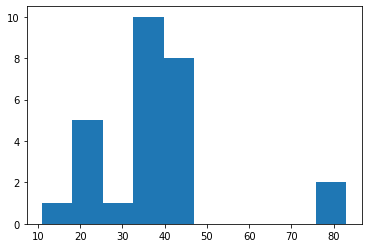

In [42]:
### Put your code here ###
import matplotlib.pyplot as plt
plt.hist(data["Gold"])
plt.title("Gold Medals")
plt.xlabel("")

<img src="https://3.bp.blogspot.com/-i-4_PJncM9Y/UPKZWigjWtI/AAAAAAAAAGw/RcMBVqvETeE/s1600/yellow_star-1331px.png" align="left" width=35px> **Time to push your changes to your github repository and then carry on**

## Part 3: Logistic Regression(9 points)

Logistic regression is a statistical method for predicting binary classes. In logistic regression, the dependent variable $y$ is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts the probability of $y$ being true as a function of the variable $x$. We will apply logistic regression to the data of gold medals.


### Part 3.1: Data Processing and Model Training (5 points)

As a logistic model outputs only binaries, we cannot apply it to predict the number of gold medals. Instead, we set a threshold, say 37, and predict if the number of gold medals is above or below 37. In this part, we will modify the data of gold medals into binaries, and then apply it to train a logistic model.   

**Question 3.1 (2 points):** Construct a data frame named "years" consisting of the years of the games (that is, 1896, 1900, 1904, ...) in the above data frame. Construct another data frame named "gold_binary", which contains the value 1 for the years when the number of gold medals is greater than 37, and contains the value 0 for the years when the number of gold medals is less than or equal to 37.   

In [ ]:
### put your code here ###


**Question 3.2 (1 point):** Apply the "train_test_split" function in the *sklearn* package to split "years" and "gold_binary" into training and testing sets. Use 75% of the data as training set and the remaining 25% as the testing set. Here "years" serves as the variable $x$ and "gold_binary" as the dependent function $y$. Print your testing set.

In [ ]:
### Put your code here ###


**Question 3.3 (2 points):** Find a suitable function in the *sklearn* package to train the logistic regression model on the training set. 

In [ ]:
### Put your code here ###


### Part 3.2: Prediction and Evaluation (4 points)

In this part, we apply the trained logistic model on the testing set and evaluate its performance.

**Question 3.4 (1 point):** Make prediction with your logistic model on the training set. Print the result. 

In [ ]:
### Put your code here ###


There are multiple metrics in the *sklearn* package to evaluate the model such as confusion matrix, accuracy, precision, and recall. You may learn what these metrics are by reading this page: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9 .

**Question 3.5 (2 points):** Compute the confusion matrix of the logistic model on the testing set and visualize it using the heat map in the package *seaborn*.

In [ ]:
### Put your code here ###


**Question 3.6 (1 point):** Compute the scores of accuracy, precision, and recall of the logistic model on the testing set.

In [ ]:
### Put your code here ###


<img src="https://3.bp.blogspot.com/-i-4_PJncM9Y/UPKZWigjWtI/AAAAAAAAAGw/RcMBVqvETeE/s1600/yellow_star-1331px.png" align="left" width=35px> **Time to push your changes to your github repository and then carry on**

## Part 4: Writing a simple Python class (8  points)


In this part, we will simulate an Olympic Games medal table using a python class.


**Question 4.1 (3 points):** Write a class named "Country". 

(1) The class should have 4 attributes: "name" (type: string), "gold" (type: integer), "silver" (type: integer), and "bronze" (type: integer). The latter 3 attributes should be a randomly generated integer between 0 and 9 (including 0 and 9). 

(2) The class should have a method called "get_info" which prints to the screen the name of the country and the number of gold, silver and bronze medals.

In [ ]:
### Put your code here ###


**Question 4.2 (5 points):** Write a for-loop to create 20 instances of the class "Country". Set their "name" attributes as "Country0, Country1, ..., Country19", respective. Make a medal table of the countries according to the following rules:

(1) A country with more gold medals comes first in the table.

(2) If two countries have equally many gold medals, the one with more silver medals comes first.

(3) If two countries have equally many gold and silver medals, the one with more bronze medals comes first.

(4) If two countries have equally many gold, silver and bronze medals, the one whose name has smaller index comes first.

Use the "get_info" method in the "Country" class to print your table to the screen. You should end up with something like this:
![text](MedalTable.png)

In [ ]:
### Put your code here ###


### Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [2]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://docs.google.com/forms/d/e/1FAIpQLSdHaDGJfKmMPGm6mq610kTxMvSlzcJTmzBffhHxrwGqpYVy-A/viewform?usp=sf_link" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

## You're Finished!

<img src="https://3.bp.blogspot.com/-i-4_PJncM9Y/UPKZWigjWtI/AAAAAAAAAGw/RcMBVqvETeE/s1600/yellow_star-1331px.png" align="left" width=35px> Time to push your changes to your github repository when you finish


<img src="https://3.bp.blogspot.com/-i-4_PJncM9Y/UPKZWigjWtI/AAAAAAAAAGw/RcMBVqvETeE/s1600/yellow_star-1331px.png" align="left" width=35px> Make sure you also turn in your completed notebook to the D2L assignment labeled `Homework 04`. We will be checking github but grading the notebooks submitted to D2L.

